#### Data Exploration

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS #for visual representation of text data.
#Stopwords are common words which do not provide any reasonable value to our data,

In [4]:
df=pd.read_csv('Hotel_Reviews.csv') #loading the datasets

In [5]:
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


Content

The csv file contains 17 fields. The description of each field is as below:

1.Hotel_Address: Address of hotel.

Review_Date: Date when reviewer posted the corresponding review.

Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.

Hotel_Name: Name of Hotel

Reviewer_Nationality: Nationality of Reviewer

Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'

ReviewTotalNegativeWordCounts: Total number of words in the negative review.

Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'

ReviewTotalPositiveWordCounts: Total number of words in the positive review.

Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience

TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.

TotalNumberof_Reviews: Total number of valid reviews the hotel has.

Tags: Tags reviewer gave the hotel.

dayssincereview: Duration between the review date and scrape date.

AdditionalNumberof_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.

lat: Latitude of the hotel

lng: longtitude of the hotel

In [6]:
df.head() # Checking the top 5 rows

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [10]:
df.sample(5) # Just sampling out any 5 rows for a better look

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
343231,Hietzinger Hauptstra e 10 14 13 Hietzing 1130 ...,247,5/26/2016,8.6,Austria Trend Parkhotel Sch nbrunn Wien,Netherlands,No Negative,0,4026,Very Nice hotel Great view of the lush garden...,13,1,7.5,"[' Business trip ', ' Family with young childr...",434 day,48.186651,16.302338
113127,225 Edgware Road Westminster Borough London W2...,1485,6/26/2017,7.5,Hilton London Metropole,Romania,There is nothing I didn t like all was good,11,6977,The bed extra comfy the food and peoples,9,1,10.0,"[' Solo traveler ', ' King Hilton Guest Room '...",38 days,51.519569,-0.170521
95743,20 28 Bolsover Street Westminster Borough Lond...,261,2/11/2016,8.1,Grange Fitzrovia Hotel,United Kingdom,I have no complaints at all,8,1034,I really appreciated the helpful and courteou...,10,2,9.6,"[' Business trip ', ' Solo traveler ', ' Super...",539 day,51.521759,-0.142538
282428,Ballester 77 81 Gr cia 08023 Barcelona Spain,43,4/14/2017,7.4,Hotel Ronda Lesseps,Sweden,The air condition did not work The electricit...,38,867,The location was good,6,1,4.6,"[' Leisure trip ', ' Family with young childre...",111 day,41.408641,2.147814
499441,Vondelstraat 18 30 Oud West 1054 GE Amsterdam ...,248,7/6/2017,8.0,Hotel Vondel Amsterdam,Romania,Everything was going well Was really proud of...,339,1952,Very comfortable room Had all the facilities ...,12,4,6.3,"[' Leisure trip ', ' Group ', ' Small Double R...",28 days,52.362566,4.877923


In [7]:
df.shape # 515,738 rows and 17 columns

(515738, 17)

In [8]:
df.info() # Shows the datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [9]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [10]:
df.isnull().sum() # Checking missing values, Latitude and longitude has some missing values (3268)

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [11]:
df['Hotel_Address'].nunique()


1493

In [12]:
df.columns # Prints 17 unique columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

<AxesSubplot:xlabel='Average_Score', ylabel='count'>

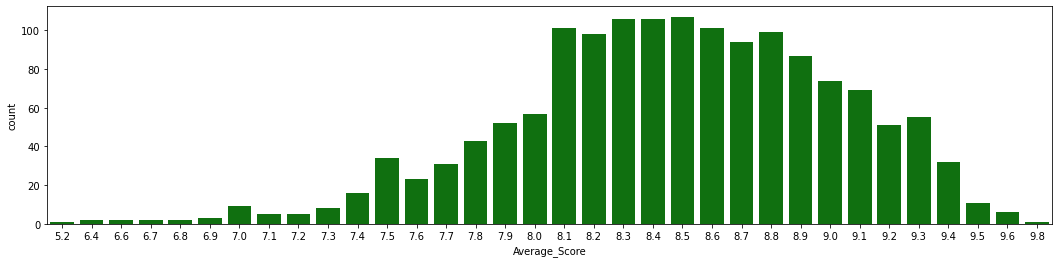

In [13]:
# Plotting the Average scores of the hotels
df_sd = df[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (18,4))
sns.countplot(x = 'Average_Score',data = df_sd,color = 'green')

In [14]:
df.Average_Score.describe()
# There are 34 unique average scor

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

Here We Can See:
Minimum Average score is 5.2

Maximum Average score is 9.8

25% of the hotels have an Average_score of 8.1 - 5.2

50% of the hotels have an Average_score of 8.4 - 8.2

75% of the hotels have an Average_score of 8.8 - 8.5


<AxesSubplot:title={'center':'Hotel distribution in European countries'}>

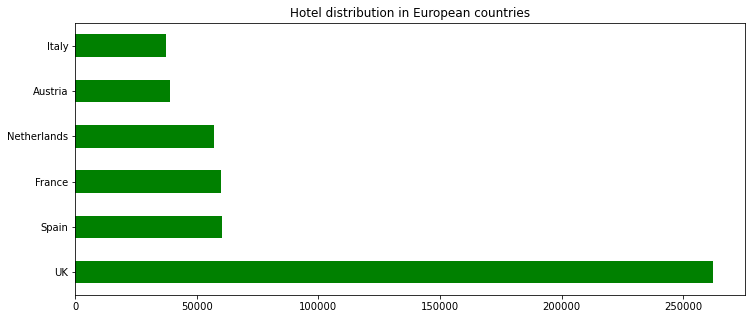

In [15]:
# We check out the distribution of hotels in the European countries
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK') # Replacing 'united kingdom' with 'UK' for easy use
df['EC'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1]) # Splitting the hotel address and picking out the last string which would be the countries
#Plotting with matplotlib 
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in European countries')
df.EC.value_counts().plot.barh(color = 'green')

In [16]:
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:10]
# We now attempt to find the 10 most popular hotels based on 'Total number of reviews, Average score greater than 8.8, and the Hotel names'

,Hotel_Name,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
327773,Ayre Hotel Gran V a,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,8.8,4324
361190,Hilton London Wembley,8.8,4305
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192


In [17]:
df['Positive_Review'] # Having a look at positive reviews|

0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4           Amazing location and building Romantic setting 
                                ...                        
515733                                             location
515734        Breakfast was ok and we got earlier check in 
515735                                          No Positive
515736     The rooms are enormous and really comfortable...
515737                                 staff was very kind 
Name: Positive_Review, Length: 515738, dtype: object

##### DATA PREPROCESSING

In [18]:
import nltk # Natural language processing toolkit
from nltk import FreqDist # Frequency distribution

import re # for regular expressions
import spacy # library for advanced Natural Language Processing

ModuleNotFoundError: No module named 'spacy'

In [20]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

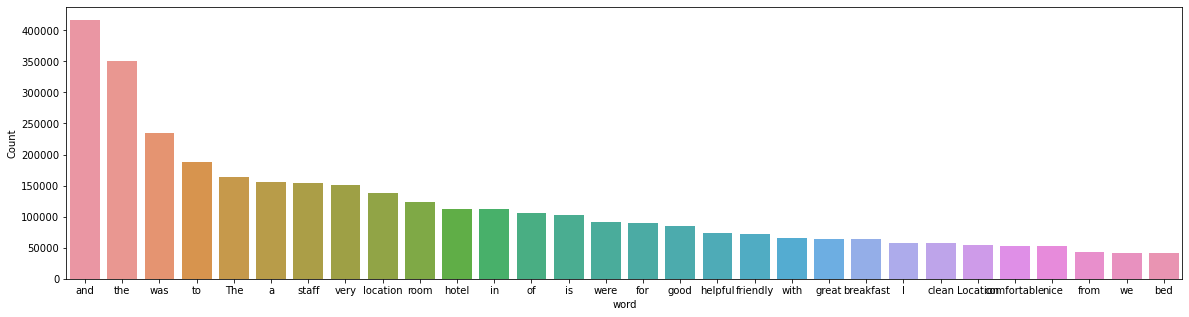

In [21]:
freq_words(df['Positive_Review']) # Frequency distribution of common words in positive reviews

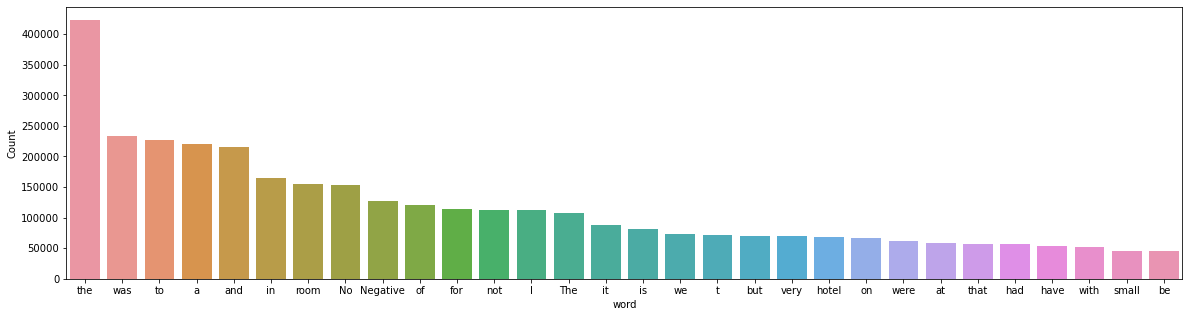

In [22]:
freq_words(df['Negative_Review'])  # Frequency distribution of common words in negative reviews


In [23]:
# You probably noticed we has a lot of word like 'the', 'was', 'to' e.t.c which won't help so we would remove them.
# First of all, we remove unwanted characters, numbers and symbols
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

C:\Users\Shoaib\AppData\Local\Temp/ipykernel_3388/2380228579.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
C:\Users\Shoaib\AppData\Local\Temp/ipykernel_3388/2380228579.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")


In [24]:
'''import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
'''


import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
def remove_sw(rev):
    rev = " ".join([i for i in rev if i not in sw])
    return rev

In [25]:
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [26]:
reviews_1 = [remove_sw(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_sw(r.split()) for r in df['Negative_Review']]


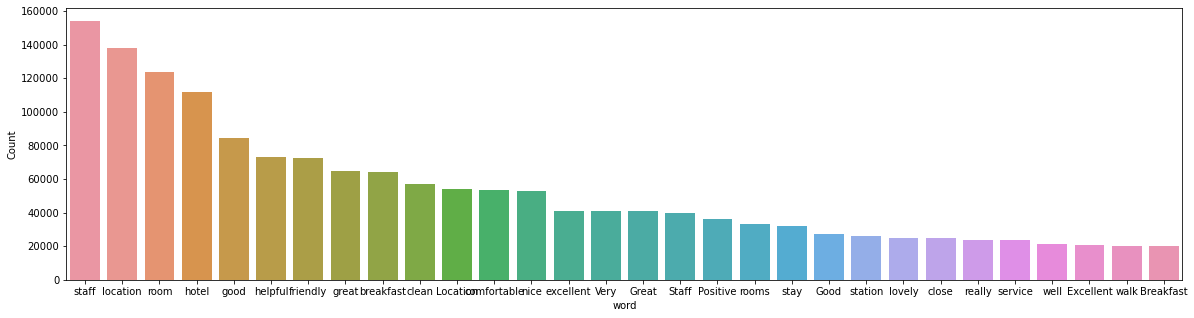

In [27]:
freq_words(reviews_1, 30) # Checking frequency of most used words in positive reviews

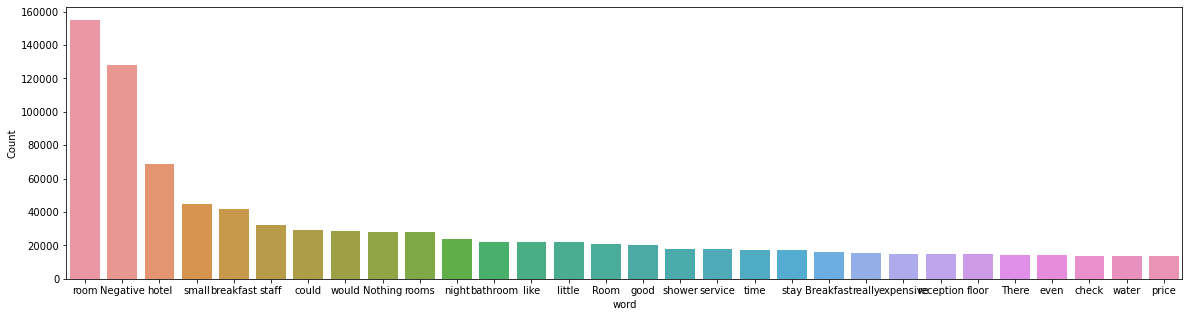

In [28]:
freq_words(reviews_2, 30) # Checking frequency of most used words in negative reviews

Positive reviews


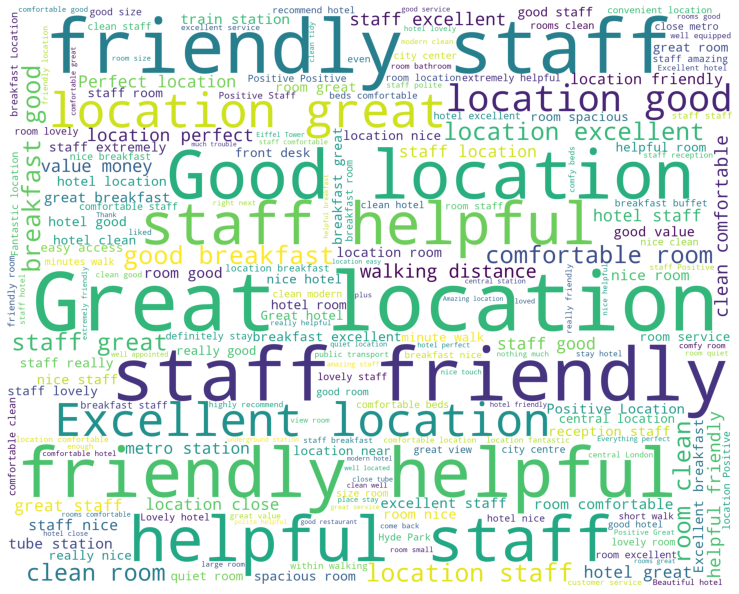

Negative reviews


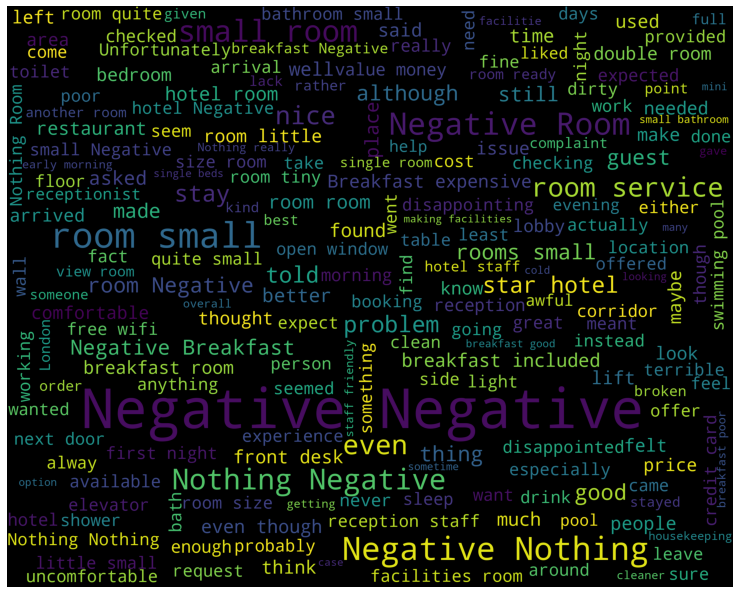

In [29]:
# Using wordcloud to visually represent the text data
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive reviews")
wordcloud_draw(reviews_1,'white')
print("Negative reviews")
wordcloud_draw(reviews_2)